In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, Input, Conv2D, MaxPool2D, Flatten

In [3]:
from keras.utils.np_utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.models import Model
import matplotlib.pyplot as plt
import random
import os
import glob

In [4]:
import numpy as np
import cv2
from PIL import Image

In [5]:
"""
files = sorted(os.listdir('7train/'))
aa = [1,4,7,10,13,16,19]
for i in aa:
    print (files[0][i])
print (files[0])
img = cv2.imread('./7train/%s'%files[0],cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
print (len(files))
"""

"\nfiles = sorted(os.listdir('7train/'))\naa = [1,4,7,10,13,16,19]\nfor i in aa:\n    print (files[0][i])\nprint (files[0])\nimg = cv2.imread('./7train/%s'%files[0],cv2.IMREAD_GRAYSCALE)\nplt.imshow(img)\nprint (len(files))\n"

データの作成

In [6]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
#(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()

In [8]:
"""
for j in range(2000):
    try:
        
        new_x_train = []
        new_y_train = []
        a = []
        for i in range(7):
            a.append(random.randint(0,len(x_train)))
            new_y_train.append(y_train[a[i]])
    #print (a)
        #x_train[a]
        new_x_train = np.hstack((x_train[a[0]], 
                            x_train[a[1]],
                            x_train[a[2]],
                            x_train[a[3]],
                            x_train[a[4]],
                            x_train[a[5]],
                            x_train[a[6]]))
        Image.fromarray(new_x_train).save('7train/%s.png'%new_y_train)
    except IndexError:
        print ('What??')
    #cv2.imwrite(new_x_train)
    #new_x_train.extend(x_train[a])
    #im_h = cv2.hconcat([im1, im1])
#new_x_train = np.array(new_x_train)
#print (len(new_x_train[0]))
#plt.figure()
#print (type(new_x_train[0]))
print (new_y_train)
print (new_x_train)
plt.imshow(new_x_train)
#plt.show()
"""

"\nfor j in range(2000):\n    try:\n        \n        new_x_train = []\n        new_y_train = []\n        a = []\n        for i in range(7):\n            a.append(random.randint(0,len(x_train)))\n            new_y_train.append(y_train[a[i]])\n    #print (a)\n        #x_train[a]\n        new_x_train = np.hstack((x_train[a[0]], \n                            x_train[a[1]],\n                            x_train[a[2]],\n                            x_train[a[3]],\n                            x_train[a[4]],\n                            x_train[a[5]],\n                            x_train[a[6]]))\n        Image.fromarray(new_x_train).save('7train/%s.png'%new_y_train)\n    except IndexError:\n        print ('What??')\n    #cv2.imwrite(new_x_train)\n    #new_x_train.extend(x_train[a])\n    #im_h = cv2.hconcat([im1, im1])\n#new_x_train = np.array(new_x_train)\n#print (len(new_x_train[0]))\n#plt.figure()\n#print (type(new_x_train[0]))\nprint (new_y_train)\nprint (new_x_train)\nplt.imshow(new_x_train

確認

In [9]:
"""
import os
os.remove('.DS_Store')
"""

"\nimport os\nos.remove('.DS_Store')\n"

0
0
0
5
1
0
5
./7train/[0, 0, 0, 5, 1, 0, 5].png
2000


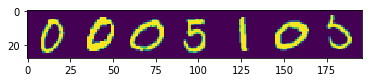

In [10]:
path = './7train/*.png'
files = sorted(glob.glob(path))
#files = sorted(os.listdir('./7train/*.png'))
#print  (files)
aa = [10,13,16,19,22,25,28]
for i in aa:
    print (files[0][i])
print (files[0])
img = cv2.imread('%s'%files[0],cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
print (len(files))

データ準備

In [11]:
test_file = []
train_file = []
test = []
train = []
test_label = []
train_label = []

In [12]:
all_files = glob.glob('7train/*.png')

In [13]:
print (all_files[0])    

7train/[0, 0, 0, 5, 1, 0, 5].png


In [14]:
rand_files = random.sample(all_files, len(all_files))

In [15]:
#number = 18
#print (rand_files[number])
#print (all_files[number])

In [16]:
filenumber = int(len(rand_files)*90/100)
train_file = rand_files[0:filenumber]

In [17]:
test_file = rand_files[filenumber:len(rand_files)]

In [18]:
print (len(train_file))
print (len(test_file))
#ここではファイル名保持＞＞＞list>str

1800
200


In [19]:
def openfile2np(train_file, train):
    for filename in train_file:
        #print (filename)
        img = cv2.imread('%s'%filename, cv2.IMREAD_GRAYSCALE)
        gray = cv2.GaussianBlur(img, ksize=(3,3),sigmaX=1.3)
        bila = cv2.bilateralFilter(gray, 15, 20, 20 )
        _, thresh = cv2.threshold(bila, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        train.append(thresh)
        #train = np.array(train)
    return train

In [20]:
train = openfile2np(train_file, train)
print (len(train))

1800


In [21]:
train = np.array(train)

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


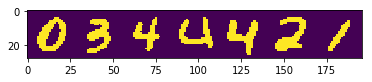

In [22]:
print (type(train))
print (train[0])
plt.imshow(train[0])

In [23]:
for i in range(len(train_file)):
    a = []
    a.append(int(train_file[i][8]))
    a.append(int(train_file[i][11]))
    a.append(int(train_file[i][14]))
    a.append(int(train_file[i][17]))
    a.append(int(train_file[i][20]))
    a.append(int(train_file[i][23]))
    a.append(int(train_file[i][26]))
    train_label.append(a)
train_label = np.array(train_label)
print (a)

[4, 2, 9, 9, 5, 5, 0]


In [24]:
print (train_label)

[[0 3 4 ... 4 2 1]
 [9 0 6 ... 4 0 1]
 [9 1 1 ... 7 5 3]
 ...
 [8 2 5 ... 9 1 8]
 [7 6 6 ... 3 3 3]
 [4 2 9 ... 5 5 0]]


In [25]:
length = 7

In [26]:
digit = [to_categorical(train_label[: , j],num_classes=10) for j in range(length)]

In [27]:
for k in range(7):
    print (digit[k][0])
print (train_label[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 3 4 4 4 2 1]


In [28]:
K.clear_session()

In [29]:
inputs = Input(shape = (28,196,1))
conv1 = Conv2D(32,(5,5),activation='relu')(inputs)
pool1 = MaxPool2D(pool_size=(2,2))(conv1)
drop1 = Dropout(0.3)(pool1)
conv2 = Conv2D(64,(5,5),activation='relu')(drop1)
pool2 = MaxPool2D(pool_size=(2,2))(conv2)
drop2 = Dropout(0.3)(pool2)

flat = Flatten()(drop2)
fc1 = Dense(500,activation='relu')(flat)
fc2 = Dense(500,activation='relu')(flat)
fc3 = Dense(500,activation='relu')(flat)
fc4 = Dense(500,activation='relu')(flat)
fc5 = Dense(500,activation='relu')(flat)
fc6 = Dense(500,activation='relu')(flat)
fc7 = Dense(500,activation='relu')(flat)

digit1 = Dense(10,activation='softmax',name='digit1')(fc1)
digit2 = Dense(10,activation='softmax',name='digit2')(fc2)
digit3 = Dense(10,activation='softmax',name='digit3')(fc3)
digit4 = Dense(10,activation='softmax',name='digit4')(fc4)
digit5 = Dense(10,activation='softmax',name='digit5')(fc5)
digit6 = Dense(10,activation='softmax',name='digit6')(fc6)
digit7 = Dense(10,activation='softmax',name='digit7')(fc7)

model = Model(inputs = inputs, outputs = [digit1,digit2,digit3,digit4,digit5,digit6,digit7])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 196, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 192, 32)  832         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 12, 96, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 12, 96, 32)   0           max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

In [31]:
model.compile(optimizer='rmsprop', loss={'digit1' : 'categorical_crossentropy', 'digit2' : 'categorical_crossentropy', 'digit3' : 'categorical_crossentropy', 'digit4' : 'categorical_crossentropy', 'digit5' : 'categorical_crossentropy', 'digit6' : 'categorical_crossentropy','digit7' : 'categorical_crossentropy'}, metrics=['accuracy'])

In [32]:
img_train = train.reshape(-1, 28, 196, 1)
img_train = img_train.astype('float32')/255

In [33]:
print (len(img_train))

1800


In [34]:
h = model.fit(img_train, {'digit1':digit[0], 'digit2':digit[1],'digit3':digit[2],'digit4':digit[3],'digit5':digit[4],'digit6':digit[5],'digit7':digit[6]},batch_size=64, epochs=3, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 1440 samples, validate on 360 samples
Epoch 1/3
1440/1440 [==============================] - 40s 28ms/step - loss: 97.0673 - digit1_loss: 13.8545 - digit2_loss: 13.8779 - digit3_loss: 13.9130 - digit4_loss: 13.9407 - digit5_loss: 14.1030 - digit6_loss: 13.8269 - digit7_loss: 13.5513 - digit1_acc: 0.1062 - digit2_acc: 0.1049 - digit3_acc: 0.0986 - digit4_acc: 0.1028 - digit5_acc: 0.0889 - digit6_acc: 0.1083 - digit7_acc: 0.1208 - val_loss: 100.8724 - val_digit1_loss: 14.3272 - val_digit2_loss: 14.3720 - val_digit3_loss: 14.6854 - val_digit4_loss: 13.7899 - val_digit5_loss: 14.4167 - val_digit6_loss: 14.3720 - val_digit7_loss: 14.9092 - val_digit1_acc: 0.1111 - val_digit2_acc: 0.1083 - val_digit3_acc: 0.0889 - val_digit4_acc: 0.1444 - val_digit5_acc: 0.1056 - val_digit6_acc: 0.1083 - val_digit7_acc: 0.0750
Epoch 2/3
1440/1440 [==============================] - 40s 28ms/step - loss: 100.7045 - digit1_loss: 14.3944 - digit2_loss: 14.

In [35]:
model.save('7number20190409.h5')

In [40]:
path_w = 'test_filename.txt'

with open(path_w, mode='w') as f:
    f.writelines(test_file)

#with open(path_w) as f:
    #print(f.read())

In [41]:
def openfile2nptest(test_file, test):
    for filename in test_file:
        #print (filename)
        img = cv2.imread('%s'%filename, cv2.IMREAD_GRAYSCALE)
        gray = cv2.GaussianBlur(img, ksize=(3,3),sigmaX=1.3)
        bila = cv2.bilateralFilter(gray, 15, 20, 20 )
        _, thresh = cv2.threshold(bila, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        test.append(thresh)
        #train = np.array(train)
    return test

In [42]:
test = openfile2nptest(test_file, test)
print (len(test))

200


In [43]:
test = np.array(test)

In [62]:
from keras.models import load_model
model = load_model("7number.h5")

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


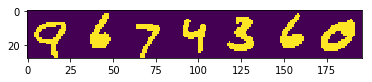

In [63]:
print (type(test))
print (test[0])
plt.imshow(test[0])

In [64]:
print (test_file[0])

7train/[9, 6, 7, 4, 3, 6, 0].png


In [67]:
for i in range(len(test_file)):
    a = []
    a.append(int(test_file[i][8]))
    a.append(int(test_file[i][11]))
    a.append(int(test_file[i][14]))
    a.append(int(test_file[i][17]))
    a.append(int(test_file[i][20]))
    a.append(int(test_file[i][23]))
    a.append(int(test_file[i][26]))
    test_label.append(a)
test_label = np.array(test_label)

In [68]:
length = 7

In [69]:
digits = [to_categorical(test_label[: , j],num_classes=10) for j in range(length)]

In [70]:
img_test = test.reshape(-1, 28, 196, 1)
img_test = img_test.astype('float32')/255

In [71]:
result =model.evaluate(img_test, digits)

200/200 [==============================] - 2s 11ms/step


In [72]:
for i, r in enumerate(result[length+1:]):
    print("Accuracy of digit {} : {}".format((i+1),r))

Accuracy of digit 1 : 0.98
Accuracy of digit 2 : 0.955
Accuracy of digit 3 : 0.975
Accuracy of digit 4 : 0.995
Accuracy of digit 5 : 0.985
Accuracy of digit 6 : 0.98
Accuracy of digit 7 : 0.96


In [73]:
#preds = np.array(model.predict(img_test))

In [74]:
#preds = np.argmax(test_label, axis=None).T

In [75]:
#matches = preds == test_label

In [76]:
#print (len(preds))

In [77]:
#print (len(preds))
#acc_string = np.sum(np.sum(matches, axis=1)==length)/len(preds)
#print (acc_string)

In [78]:
#print (result)

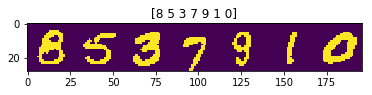

In [79]:
num = 101
#print (test[num])
plt.title(test_label[num])
plt.imshow(test[num])

In [80]:
preds = np.array(model.predict(img_test))
#preds = preds[num].argmax()
#print (preds)

In [81]:
for i in range(length):
    print (preds[i][num].argmax(), end="")

8537910